# Bias Mitigation Analysis - All

In [1]:
data_name = 'All'

In [2]:
from analysis_utils import *
%matplotlib inline

In [3]:
# import os
import pandas as pd
dir_path = './Result_Diff_Degree/'
all_table_list = {}
for metric in ['Accuracy','Fairness']:
    for category in ['metrics','base','bm']:
        key = ('_').join([metric, category])
        all_table_list[key] = {}
        print('-'*30)
        print(key)
        print('-'*30)
        for dataset in ['Adult','Compas','German_Credit']:
            file = (('_').join([dataset, metric, category]))
            print(dataset)
            table = pd.read_pickle(dir_path+file)
            all_table_list[('_').join([metric, category])][dataset] = table
        # add the tables together accordingly
        all_table_list[key]['All'] = all_table_list[key]['Adult']+\
                                     all_table_list[key]['Compas']+\
                                     all_table_list[key]['German_Credit']

------------------------------
Accuracy_metrics
------------------------------
Adult
Compas
German_Credit
------------------------------
Accuracy_base
------------------------------
Adult
Compas
German_Credit
------------------------------
Accuracy_bm
------------------------------
Adult
Compas
German_Credit
------------------------------
Fairness_metrics
------------------------------
Adult
Compas
German_Credit
------------------------------
Fairness_base
------------------------------
Adult
Compas
German_Credit
------------------------------
Fairness_bm
------------------------------
Adult
Compas
German_Credit


In [4]:
# show one "All" table
all_table_list['Accuracy_metrics']['All']

,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score
noorincrease,113,105,121,55,89,89
small,0,2,0,12,7,7
medium,5,6,11,5,9,9
large,38,43,24,84,51,51


In [5]:
import seaborn as sns
accuracy_metrics = ['acc_score', 'bacc_score', 'f1_score', 'auc_score', 'mcc_score','norm_mcc_score']
group_fairness = ['spd_score', 'aod_score', 'eod_score','ford_score','ppvd_score']
individual_fairness = ['(1-consistency_score)','gei_score','ti_score']
fairness_metrics = group_fairness+individual_fairness
avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]

In [6]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]

## Analysis like in Chen et al. (2023)

### Accuracy Behavior After Bias Mitigations

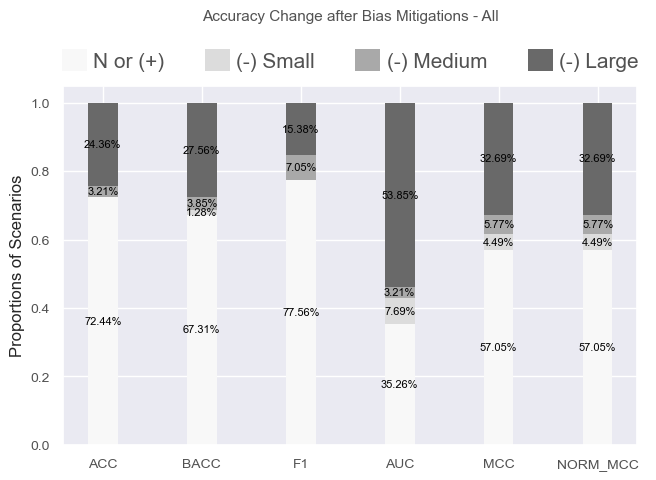

In [6]:
diff_degree = all_table_list['Accuracy_metrics']['All']
plot_behaviour_analysis(diff_degree, data_name, caption='Accuracy Change after Bias Mitigations - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per BM

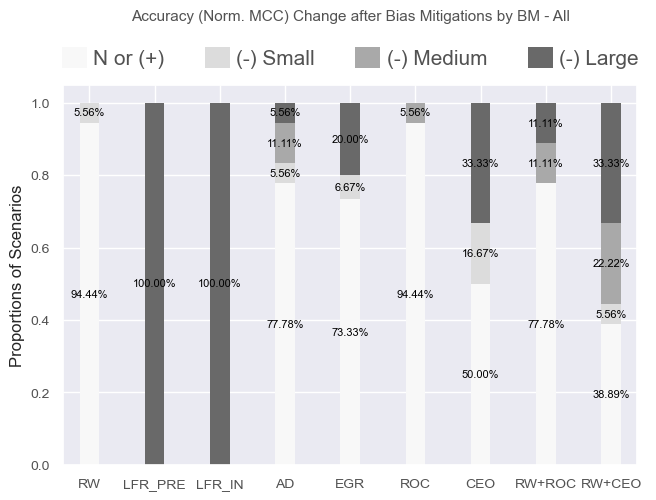

In [7]:
diff_degree = all_table_list['Accuracy_bm']['All']
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by BM - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per base

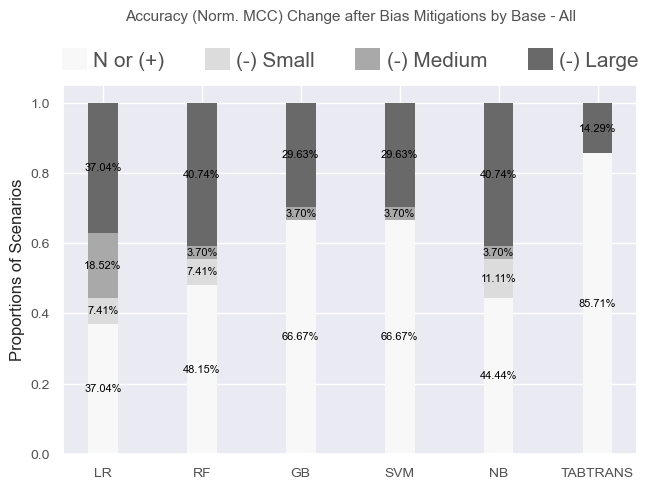

In [8]:
diff_degree = all_table_list['Accuracy_base']['All']
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by Base - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations

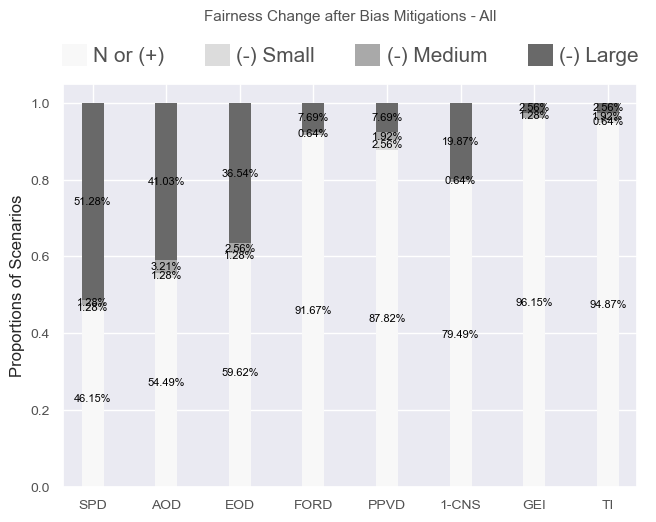

In [9]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = all_table_list['Fairness_metrics']['All']
plot_behaviour_analysis(diff_degree, data_name, caption='Fairness Change after Bias Mitigations - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per BM

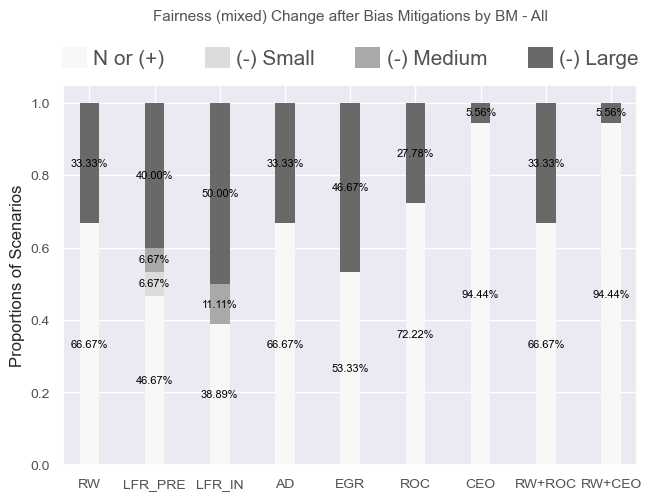

In [10]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = all_table_list['Fairness_bm']['All']
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Fairness (mixed) Change after Bias Mitigations by BM - {}',
                        figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per base

In [11]:
all_table_list.keys()

dict_keys(['Accuracy_metrics', 'Accuracy_base', 'Accuracy_bm', 'Fairness_metrics', 'Fairness_base', 'Fairness_bm'])

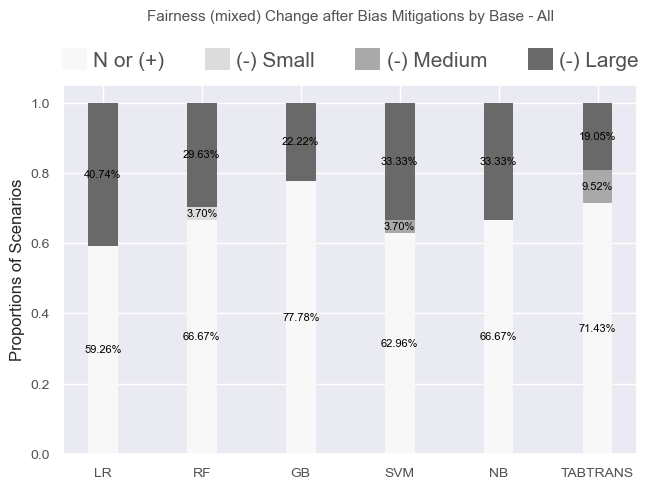

In [12]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = all_table_list['Fairness_base']['All']
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Fairness (mixed) Change after Bias Mitigations by Base - {}',
                        figsize=(8, 6))

## Heatmap

In [7]:
import os
import pandas as pd
results_all = pd.DataFrame()
for datafile in ['Adult','Compas','German_Credit']:
    dir_path = './{}_results/'.format(datafile)
    for file in os.listdir(dir_path):
        print(file)
        result = pd.read_pickle(dir_path+file)
        result.insert(0,'dataset',datafile)
        results_all = pd.concat([results_all, result])

Adult_results_GB
Adult_results_NB
Adult_results_SVM_RWCEO
Adult_results_SVM_EGR4
Adult_results_SVM_EGR3
Adult_results_TabTrans_RW+CEO
Adult_results_SVM_EGR
Adult_results_SVM_EGR2
Adult_results_TabTrans_ROC
Adult_results_SVM_CEO
Adult_results_LR
Adult_results_TabTrans_None
Adult_results_SVM_LFR_pre2
Adult_results_SVM_None
Adult_results_SVM_RW
Adult_results_SVM_ROC
Adult_results_SVM_LFR_pre
Adult_results_TabTrans_RW
Adult_results_TabTrans_CEO
Adult_results_TabTrans_RW+ROC
Adult_results_RF
Adult_results_SVM_RWROC
Compas_results_SVM
Compas_results_RF
Compas_results_GB
Compas_results_NB
Compas_results_TabTrans
Compas_results_LR
German_Credit_results_LR
German_Credit_results_GB
German_Credit_results_NB
German_Credit_results_RF
German_Credit_results_TabTrans
German_Credit_results_SVM


In [8]:
results_all_converted = results_all.copy(deep=True).reset_index(drop=True)
for col in avg_fairness_metrics:
    abs_col_name = 'abs_'+col
    results_all_converted[abs_col_name] = results_all_converted[col].abs()

In [9]:
# change column name so metrics name get more concise in the heatmaps
accuracy_map = [col.removeprefix('avg_').removesuffix('_score').upper() for col in avg_accuracy_metrics]
print(accuracy_map)
fairness_map = [col.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper() for col in abs_avg_fairness_metrics]
fairness_map = ['1-CNS' if x=='(1-CONSISTENCY_SCORE)' else x for x in fairness_map]
print(fairness_map)

acc_rename = {avg_accuracy_metrics[i]:accuracy_map[i] for i in range(len(accuracy_map))}
fair_rename = {abs_avg_fairness_metrics[i]:fairness_map[i] for i in range(len(fairness_map))}
results_all_converted = results_all_converted.rename(columns=acc_rename).rename(columns=fair_rename)

['ACC', 'BACC', 'F1', 'AUC', 'MCC', 'NORM_MCC']
['SPD', 'AOD', 'EOD', 'FORD', 'PPVD', '1-CNS', 'GEI', 'TI']


In [10]:
data = results_all_converted.copy()
base_invariant = data.loc[data.Bias_Mitigation.isin(['AD','LFR_in'])]
for base in data.base_estimator.unique():
    if data[(data.base_estimator==base)\
            &((data.Bias_Mitigation=='AD')|(data.Bias_Mitigation=='LFR_in'))].shape[0]==0:
        dup = base_invariant.copy()
        dup['base_estimator'] = dup['base_estimator'].replace({'LR':base})
        data = pd.concat([data, dup])

for base in data.base_estimator.unique():
    print(base,": ", data[data.base_estimator==base].Bias_Mitigation.unique())

GB :  ['None' 'RW' 'LFR_pre' 'EGR' 'ROC' 'CEO' 'RW+ROC' 'RW+CEO' 'LFR_in' 'AD']
NB :  ['None' 'RW' 'LFR_pre' 'EGR' 'ROC' 'CEO' 'RW+ROC' 'RW+CEO' 'LFR_in' 'AD']
SVM :  ['RW+CEO' 'EGR' 'CEO' 'LFR_pre' 'None' 'RW' 'ROC' 'RW+ROC' 'LFR_in' 'AD']
TabTrans :  ['RW+CEO' 'ROC' 'None' 'RW' 'CEO' 'RW+ROC' 'LFR_in' 'AD']
LR :  ['None' 'RW' 'LFR_pre' 'LFR_in' 'AD' 'EGR' 'ROC' 'CEO' 'RW+ROC' 'RW+CEO']
RF :  ['None' 'RW' 'LFR_pre' 'EGR' 'ROC' 'CEO' 'RW+ROC' 'RW+CEO' 'LFR_in' 'AD']


In [11]:
# import numpy as np
# from scipy import stats
# import matplotlib.pyplot as plt

# def corr_heatmap_with_significance(df, annot=True, sig_levels=(0.05, 0.01, 0.001), acc=False):
#     space = 0.1 if acc else 0
#     corr_matrix = df.corr('spearman')
#     mask = np.zeros_like(corr_matrix, dtype=bool)
#     mask[np.triu_indices_from(mask)] = True
#     with sns.axes_style("dark"):
#         ax = sns.heatmap(corr_matrix, mask=mask, annot=annot, annot_kws={'fontsize': 10},
#                          cmap='vlag', vmin=-1, vmax=1, fmt=".1f", center=0, square=True)
#         for i in range(corr_matrix.shape[0]):
#             for j in range(i+1, corr_matrix.shape[1]):
#                 val = corr_matrix.iloc[i, j]
#                 p = stats.pearsonr(df.iloc[:, i], df.iloc[:, j])[1]
#                 sig_stars = ''
#                 for idx, level in enumerate(sig_levels):
#                     if p <= level:
#                         sig_stars += '*'
#                 if sig_stars:
#                     ax.text(i+0.5, j+0.9+space, '{}'.format(sig_stars), ha='center', va='center', fontsize=12)
#                     # ax.text(j+0.5, i+0.9+space, '{}'.format(sig_stars), ha='center', va='center', fontsize=12)
#                 else: pass
#                     # ax.text(i+0.2, j+0.9, '{:.2f}'.format(val), ha='center', va='center', fontsize=10)
#         if acc: ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')
#         else: ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
#     return ax

### Original Metrics

<AxesSubplot:>

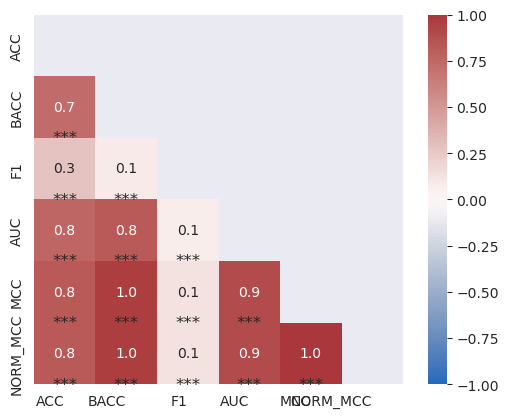

In [15]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[accuracy_map], acc=True)
g
# g.figure.savefig('./Heatmap/'+data_name+'acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

<AxesSubplot:>

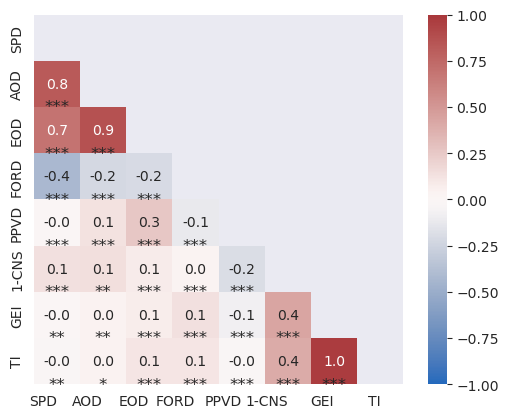

In [16]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[fairness_map], acc=True)
g
# g.figure.savefig('./Heatmap/'+data_name+'acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

#### Changes of Metrics

In [13]:
df_metric_diff = get_df_metric_diff(data, metric_list=accuracy_map+fairness_map)
df_metric_diff

,dataset,base_estimator,Bias_Mitigation,ACC,BACC,F1,AUC,MCC,NORM_MCC,SPD,AOD,EOD,FORD,PPVD,1-CNS,GEI,TI
0,Adult,RF,RW,0.002261,-0.002761,-0.000487,-0.000635,-0.001479,-0.000740,-0.035072,-0.036583,-0.039260,0.007427,0.061867,-0.000302,0.000781,0.002186
1,Adult,RF,RW,0.000366,-0.001869,-0.001153,-0.000406,-0.002003,-0.001002,-0.037449,-0.040908,-0.045799,0.007150,0.071471,0.001201,0.000556,0.001239
2,Adult,RF,RW,0.001119,0.001960,0.002275,0.001050,0.003280,0.001640,-0.028106,-0.032938,-0.038294,0.004010,0.059485,0.001232,-0.000591,-0.000973
3,Adult,RF,RW,-0.000797,-0.001655,-0.001783,-0.000027,-0.002633,-0.001317,-0.034254,-0.043465,-0.056056,0.008277,0.060285,-0.000314,0.000490,0.000848
4,Adult,RF,RW,0.000086,-0.003584,-0.003247,-0.000635,-0.002629,-0.001315,-0.031997,-0.052447,-0.079738,0.011354,0.070333,0.000245,0.000701,0.002064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,German_Credit,RF,AD,-0.040000,-0.011429,-0.040570,-0.023405,-0.044333,-0.022166,0.051199,0.095723,0.137575,0.221132,0.052826,0.026000,0.040620,0.065932
16,German_Credit,RF,AD,-0.015000,0.002619,-0.020736,0.018286,0.001817,0.000909,0.048004,0.094624,0.114833,0.199306,0.029081,-0.001800,0.021703,0.034490
17,German_Credit,RF,AD,-0.001000,-0.002619,0.000029,-0.018524,-0.005156,-0.002578,0.081203,0.130346,0.150571,0.183024,0.029102,0.010200,-0.000117,-0.000838
18,German_Credit,RF,AD,-0.009000,0.013571,-0.017176,0.018071,0.020558,0.010279,0.026442,0.066618,0.105236,0.195483,0.049696,-0.005400,0.019321,0.033428


<AxesSubplot:>

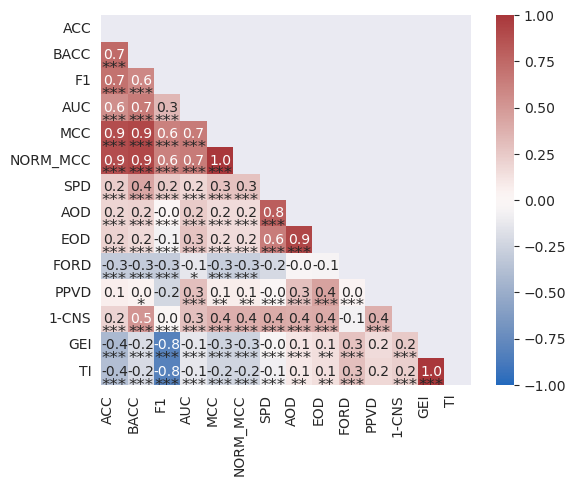

In [14]:
# change, spearman
g = corr_heatmap_with_significance(df_metric_diff[accuracy_map+fairness_map], acc=True)
g
# g.figure.savefig('./Heatmap/'+'acc_fair_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

In [10]:
# # sns.color_palette("vlag", as_cmap=True)
# sns.set(font_scale = 1)
# # avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
# # avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]
# g = sns.heatmap(results_all_converted[fairness_map].corr(), annot=True, fmt=".1f",
#             cmap="vlag", vmin=-1, vmax=1)
# g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
# g.set_xticklabels(g.get_xticklabels(), fontsize = 10)
# g.figure.savefig('./Heatmap/'+'fariness_corr'+'.png', bbox_inches='tight')

In [11]:
# sns.set(font_scale = 1)
# # avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
# # avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]
# g = sns.heatmap(results_all_converted[accuracy_map+fairness_map].corr(), annot=True, fmt=".1f", 
#             cmap="vlag", vmin=-1, vmax=1)
# g.set_yticklabels(g.get_yticklabels(), fontsize = 10)
# g.set_xticklabels(g.get_xticklabels(), fontsize = 10)
# g.figure.savefig('./Heatmap/'+'acc_fair_corr'+'.png', bbox_inches='tight')

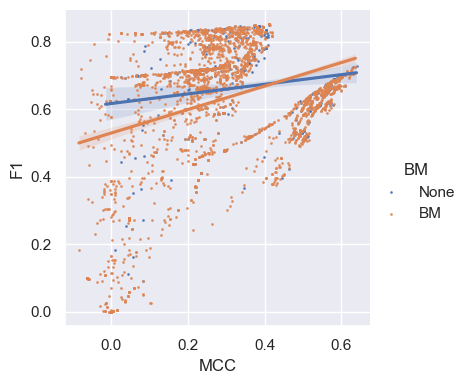

In [23]:
results_all_converted
df_results = results_all_converted.copy()
df_results['BM'] = np.where(df_results['Bias_Mitigation']=='None', 'None', 'BM')
sns.set(font_scale = 1)
g = sns.lmplot(data=df_results, x="MCC", y="F1", height=4, scatter_kws={'s':1}, hue='BM')
# .fig.suptitle("Graph (a)")
ax = plt.gca()
# ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# # save plot
# g.savefig('./Result_Plots/'+data_name+'_2D_general'+'.png', bbox_inches='tight')

None
BM


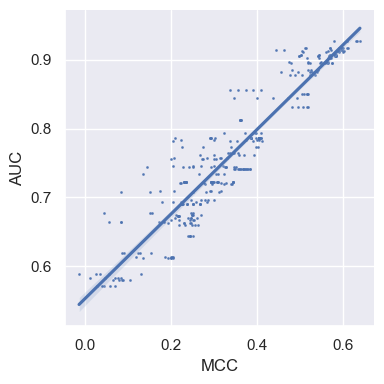

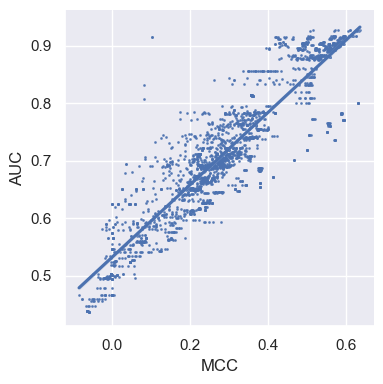

In [21]:
results_all_converted
df_results = results_all_converted.copy()
df_results['BM'] = np.where(df_results['Bias_Mitigation']=='None', 'None', 'BM')
for BM in df_results['BM'].unique():
    print(BM)
    sns.set(font_scale = 1)
    g = sns.lmplot(data=df_results[df_results.BM == BM], x="MCC", y="AUC", height=4, scatter_kws={'s':1})
    # .fig.suptitle("Graph (a)")
    ax = plt.gca()


In [27]:
# metric_list = accuracy_map+fairness_map
# df_metric_diff = pd.DataFrame()

# for dataset in data.dataset.unique():
#     df_base_BM = pd.DataFrame(columns=['dataset','base_estimator','Bias_Mitigation'])
#     for base in data.base_estimator.unique():
#         df_base = pd.DataFrame(columns=['dataset','base_estimator','Bias_Mitigation'])
#         for metric in metric_list:
#             default = data[(data.dataset==dataset)&\
#                                 (data.base_estimator==base)&\
#                                 (data.Bias_Mitigation=='None')]
#             default = default.sort_values(by=['threshold','param']).reset_index(drop=True)
#             default_list = default[metric]
#             df_base_BM = pd.DataFrame()
#             for BM in data[data.base_estimator==base].Bias_Mitigation.unique():
#                 if BM == 'None': pass
#                 else: 
#                     bm = data[(data.dataset==dataset)&\
#                                    (data.base_estimator==base)&\
#                                    (data.Bias_Mitigation==BM)]
#                     bm = bm.sort_values(by=['threshold','param']).reset_index(drop=True)
#                     bm_list = bm[metric]
#                     # print(bm_list)
#                     if (default.iloc[:, [0,1,2,4]] != bm.iloc[:, [0,1,2,4]]).any().any():
#                         if (BM in ['AD','LFR_in'])&((default.iloc[:, [0,1,4]]==bm.iloc[:, [0,1,4]]).all().all()): pass
#                         else: 
#                             print(dataset, base, BM)
#                     change = bm_list-default_list
#                     # print(dataset, base, BM, metric, change)
#                     subset = pd.DataFrame(data={'dataset': dataset, 'base_estimator': base,
#                                                 'Bias_Mitigation': BM}, index=range(len(change)))

#                     subset[metric] = change
#                     df_base_BM = pd.concat([df_base_BM, subset])
#                     # display(subset)
#             # display(df_base_BM)
#             if df_base_BM.columns[-1]=='ACC': 
#                 df_base = df_base_BM.copy()
#                 standard_order = df_base_BM.iloc[:,:-1]
#             else: 
#                 if (df_base_BM.iloc[:,:-1].values==standard_order.values).all(): 
#                     df_base[metric] = df_base_BM[metric]
#                 else: print('Wrong order, cannot concat')

#     df_metric_diff = pd.concat([df_metric_diff, df_base])
# df_metric_diff
                

,dataset,base_estimator,Bias_Mitigation,ACC,BACC,F1,AUC,MCC,NORM_MCC,SPD,AOD,EOD,FORD,PPVD,1-CNS,GEI,TI
0,Adult,RF,RW,0.002261,-0.002761,-0.000487,-0.000635,-0.001479,-0.000740,-0.035072,-0.036583,-0.039260,0.007427,0.061867,-0.000302,0.000781,0.002186
1,Adult,RF,RW,0.000366,-0.001869,-0.001153,-0.000406,-0.002003,-0.001002,-0.037449,-0.040908,-0.045799,0.007150,0.071471,0.001201,0.000556,0.001239
2,Adult,RF,RW,0.001119,0.001960,0.002275,0.001050,0.003280,0.001640,-0.028106,-0.032938,-0.038294,0.004010,0.059485,0.001232,-0.000591,-0.000973
3,Adult,RF,RW,-0.000797,-0.001655,-0.001783,-0.000027,-0.002633,-0.001317,-0.034254,-0.043465,-0.056056,0.008277,0.060285,-0.000314,0.000490,0.000848
4,Adult,RF,RW,0.000086,-0.003584,-0.003247,-0.000635,-0.002629,-0.001315,-0.031997,-0.052447,-0.079738,0.011354,0.070333,0.000245,0.000701,0.002064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,German_Credit,RF,AD,-0.040000,-0.011429,-0.040570,-0.023405,-0.044333,-0.022166,0.051199,0.095723,0.137575,0.221132,0.052826,0.026000,0.040620,0.065932
16,German_Credit,RF,AD,-0.015000,0.002619,-0.020736,0.018286,0.001817,0.000909,0.048004,0.094624,0.114833,0.199306,0.029081,-0.001800,0.021703,0.034490
17,German_Credit,RF,AD,-0.001000,-0.002619,0.000029,-0.018524,-0.005156,-0.002578,0.081203,0.130346,0.150571,0.183024,0.029102,0.010200,-0.000117,-0.000838
18,German_Credit,RF,AD,-0.009000,0.013571,-0.017176,0.018071,0.020558,0.010279,0.026442,0.066618,0.105236,0.195483,0.049696,-0.005400,0.019321,0.033428


<AxesSubplot:>

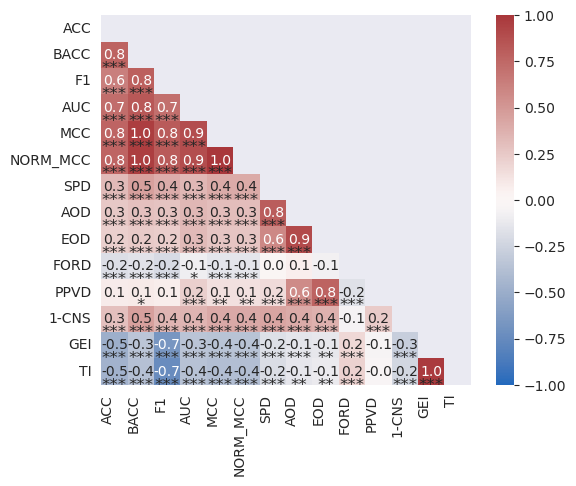

In [31]:
# change, pearson
g = corr_heatmap_with_significance(df_metric_diff[accuracy_map+fairness_map], acc=True)
g
# g.figure.savefig('./Heatmap/'+'acc_fair_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

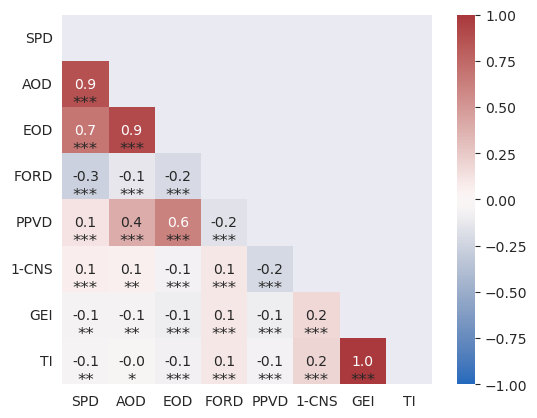

In [14]:
g = corr_heatmap_with_significance(results_all_converted[fairness_map])
g 
g.figure.savefig('./Heatmap/'+'fariness_corr'+'.png', bbox_inches='tight')

In [39]:
import numpy as np
from scipy import stats
res = stats.spearmanr([1, 2, 3, 4, 5], [5, 6, 7, 8, 7])
res.correlation

0.8207826816681233

In [41]:
stats.spearmanr([1, 2, 3, 4, 5], [-1, -2, -3, -4, -5])

SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24)

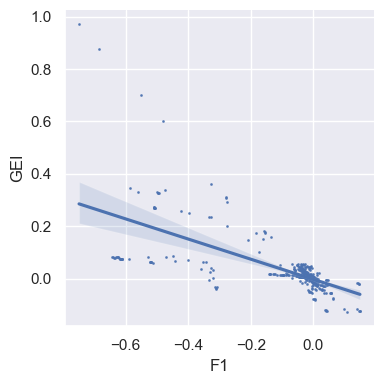

In [43]:
sns.set(font_scale = 1)
g = sns.lmplot(data=df_metric_diff, x="F1", y="GEI", height=4, scatter_kws={'s':1})
# .fig.suptitle("Graph (a)")
ax = plt.gca()


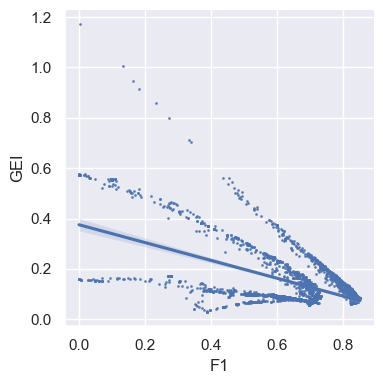

In [44]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x="F1", y="GEI", height=4, scatter_kws={'s':1})
# .fig.suptitle("Graph (a)")
ax = plt.gca()


Adult
Compas
German_Credit


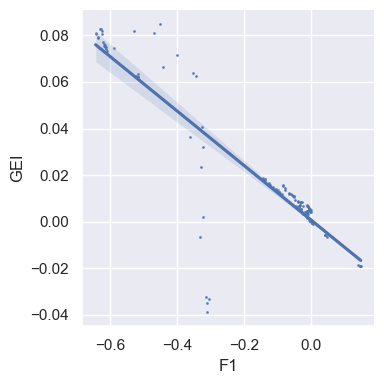

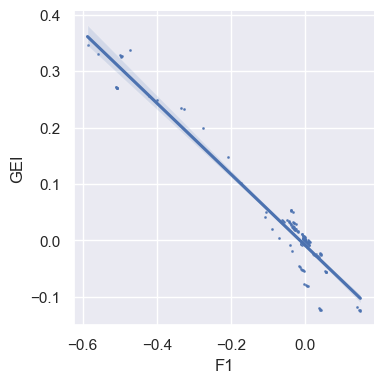

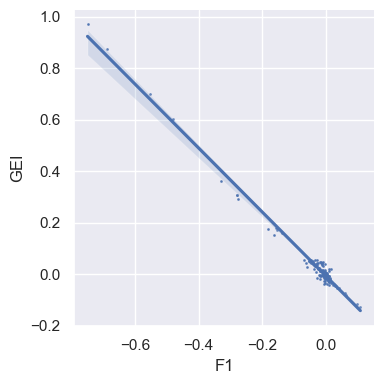

In [47]:
for dataset in df_metric_diff.dataset.unique():
    print(dataset)
    sns.set(font_scale = 1)
    g = sns.lmplot(data=df_metric_diff[df_metric_diff.dataset==dataset],
                   x="F1", y="GEI", height=4, scatter_kws={'s':1})
    # .fig.suptitle("Graph (a)")
    ax = plt.gca()


Adult
Compas
German_Credit


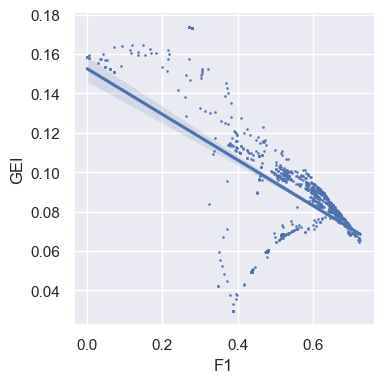

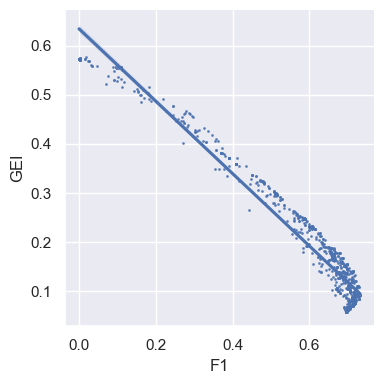

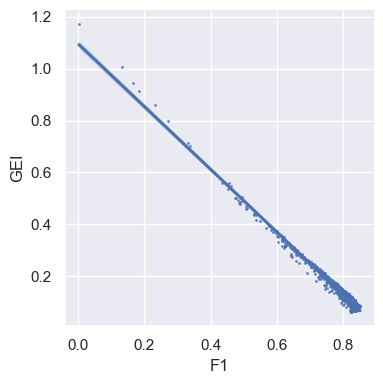

In [46]:
for dataset in results_all_converted.dataset.unique():
    print(dataset)
    sns.set(font_scale = 1)
    g = sns.lmplot(data=results_all_converted[results_all_converted.dataset==dataset],
                   x="F1", y="GEI", height=4, scatter_kws={'s':1})
    # .fig.suptitle("Graph (a)")
    ax = plt.gca()


In [ ]:
# df_results = results_all_converted.copy()
# df_results['BM'] = np.where(df_results['Bias_Mitigation']=='None', 'None', 'BM')
# for BM in df_results['BM'].unique():
#     print(BM)
#     sns.set(font_scale = 1)
#     g = sns.lmplot(data=df_results[df_results.BM == BM], x="MCC", y="AUC", height=4, scatter_kws={'s':1})
#     # .fig.suptitle("Graph (a)")
#     ax = plt.gca()
